In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS, "uciml/breast-cancer-wisconsin-data", file_path
)

df.head()

/home/yomma/itmo/fall-2025/students/mavlyukeev-av/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_58724/2275708220.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": -1}).astype(float)
df.dtypes

id                           int64
diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [3]:
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

feature_names = df.drop(columns=["diagnosis"]).columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
X = df[feature_names]
y = df["diagnosis"].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Реализованный SVM

In [7]:
from svm import RBFKernel, SVMClassifier

model = SVMClassifier(kernel=RBFKernel(gamma=0.05), C=1.0)
model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

print(f"Support vectors: {len(model.support_vectors)}")

y_pred = model.predict(X_test_scaled)
print(f"Custom SVM Accuracy: {round(accuracy_score(y_test, y_pred), 3)}")
print(f"Custom SVM Accuracy: {round(precision_score(y_test, y_pred), 3)}")
print(f"Custom SVM Accuracy: {round(recall_score(y_test, y_pred), 3)}")
print(f"Custom SVM Accuracy: {round(f1_score(y_test, y_pred), 3)}")
print("Custom SVM Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Support vectors: 128
Custom SVM Accuracy: 0.965
Custom SVM Accuracy: 0.975
Custom SVM Accuracy: 0.929
Custom SVM Accuracy: 0.951
Custom SVM Confusion matrix:
[[71  1]
 [ 3 39]]


Эталон

In [ ]:
from sklearn.svm import SVC

sklearn_model = SVC(kernel="rbf")
sklearn_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred_sklearn = sklearn_model.predict(X_test_scaled)
print(f"Sklearn SVM Accuracy: {accuracy_score(y_test, y_pred_sklearn):.3f}")
print(f"Custom SVM Accuracy: {round(precision_score(y_test, y_pred_sklearn), 3)}")
print(f"Custom SVM Accuracy: {round(recall_score(y_test, y_pred_sklearn), 3)}")
print(f"Custom SVM Accuracy: {round(f1_score(y_test, y_pred_sklearn), 3)}")
print(f"Sklearn SVM Support vectors: {len(sklearn_model.support_vectors_)}")
print("Sklearn SVM Confusion matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))

Sklearn SVM Accuracy: 0.974
Custom SVM Accuracy: 1.0
Custom SVM Accuracy: 0.929
Custom SVM Accuracy: 0.963
Sklearn SVM Support vectors: 107
Sklearn SVM Confusion matrix:
[[72  0]
 [ 3 39]]


/tmp/ipykernel_58724/154563561.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


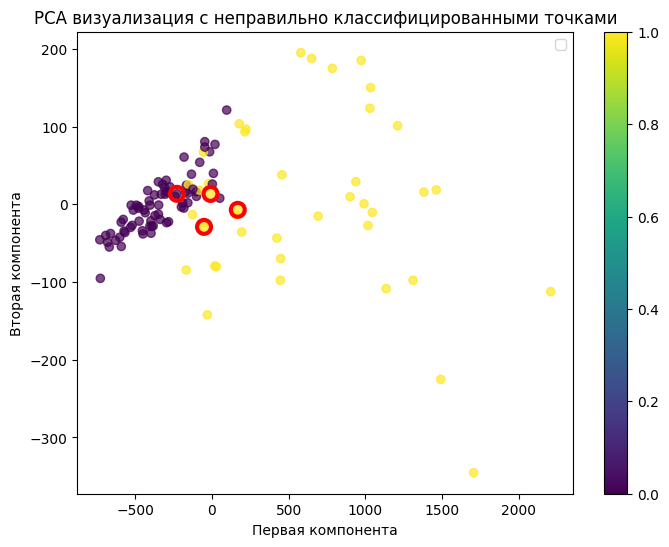

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap="viridis", alpha=0.7)

misclassified = y_pred != y_test
if np.any(misclassified):
    plt.scatter(
        X_pca[misclassified, 0],
        X_pca[misclassified, 1],
        facecolors="none",
        edgecolors="red",
        linewidth=3,
        s=100,
    )
    plt.legend()

plt.colorbar()
plt.title("PCA визуализация с неправильно классифицированными точками")
plt.xlabel("Первая компонента")
plt.ylabel("Вторая компонента")
plt.savefig("../misc/pca_points.png")
plt.show()
